Cross-over analysis to examine whether HAT could detect local/global surprise at different levels

<img src="cross-over.png">

In [1]:
import numpy as np
import HAT_model as HAT
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import copy
import random
%load_ext autotime

In [2]:
seqs = 'abcdefgh','abldefgh','ijkdmnop','ijqdmnop'

def train_general(language, t, noise):
    seq = ''
    x = np.arange(0,len(language))
    x = np.repeat(x,t)
    np.random.shuffle(x)
    for i in range(len(x)):
        if len(noise)>3:
            filler = ''.join(map(str, random.sample(noise,random.randint(5,8))))
            seq = seq + filler
        seq = seq + language[x[i]]
    return seq

def convert_symbol_to_array(string, bipolar_size):
    str_arr = np.zeros((0,bipolar_size))
    n_arr = np.zeros((0,bipolar_size))
    m=0.3
    for i in range(0,len(string)):
        if string[i]=='z':
            x = np.zeros((1,bipolar_size))+np.random.uniform(-0.5,0.5,bipolar_size)
            str_arr=np.concatenate((str_arr,x),axis=0)
        else:
            x = np.zeros((1,bipolar_size))-1
            x[0,ord(string[i])-97] = 1
            n = m*(np.random.rand(1,bipolar_size)-0.5)
            n_arr = np.concatenate((n_arr,n),0)
            x = x + n
            str_arr=np.concatenate((str_arr,x),axis=0) 
        
    return str_arr

time: 80.3 ms


In [3]:
seq_train = train_general(seqs, 500, 'zzzzzzzz')

time: 122 ms


In [4]:
bipolar_size=17
bipolar_seq=convert_symbol_to_array(seq_train, bipolar_size)

time: 25.1 s


In [5]:
test_seqs = seqs + ('abcdmnop', 'ijkdefgh')
test_seqs

('abcdefgh', 'abldefgh', 'ijkdmnop', 'ijqdmnop', 'abcdmnop', 'ijkdefgh')

time: 18.7 ms


In [6]:
test_times=10
seq_test = train_general(test_seqs, 10, 'zzzzzzzz')

time: 8.02 ms


In [7]:
bipolar_seq_test=convert_symbol_to_array(seq_test, bipolar_size)

time: 59.8 ms


In [ ]:
def test_wts(seq,wts,Modeltype,obj,k, tau):
        test_wts = HAT.HAT_test(seq,wts['IH_wts'], wts['HO_wts'], wts['IH_wts1'], wts['HO_wts1'], wts['IH_wts2'], wts['HO_wts2'],tau, Modeltype,obj,k,ip_noise)  
    
        return test_wts


time: 7.33 ms


In [ ]:
#train HAT model with three sequences (with filler between)
n_sbj=10
obj='max'
ip_noise=[0,0,0]
Modeltype='Full'
tau=[0,0.4,0.8]
learning_rate=[0.1,0.05,0.05]
ws = 0.5 #initial weights scale
k= [1,1,1]
surprisal=[]
surprisal1=[]
surprisal2=[]

for i in range(0,n_sbj):
    seq_train = train_general(seqs, 1000, 'zzzzzzzz')
    bipolar_seq=convert_symbol_to_array(seq_train, bipolar_size)
    print(i)    
    s = np.shape(bipolar_seq)
    IH_wts = ws*(2*np.random.rand(2*s[1]+1, s[1])-1)
    HO_wts = ws*(2*np.random.rand(s[1]+1, 2*s[1])-1)
    IH_wts1 = ws*(2*np.random.rand(2*s[1]+1, s[1])-1)
    HO_wts1 = ws*(2*np.random.rand(s[1]+1, 2*s[1])-1)
    IH_wts2 = ws*(2*np.random.rand(2*s[1]+1, s[1])-1)
    HO_wts2 = ws*(2*np.random.rand(s[1]+1, 2*s[1])-1)
    print(Modeltype)

    wts=HAT.HAT_learn(bipolar_seq,IH_wts,HO_wts,IH_wts1,HO_wts1,IH_wts2,HO_wts2,learning_rate,tau,Modeltype,obj,k,ip_noise)

    test = test_wts(bipolar_seq_test,wts,Modeltype,obj,k, tau)

    surprisal.append(test['D'])
    surprisal1.append(test['D1'])
    surprisal2.append(test['D2'])

0
Full
1
Full
2
Full
3
Full
4
Full
5
Full
6
Full
7
Full
8
Full
9
Full
time: 1h 33min 25s


In [ ]:
seq_test_trim=seq_test[2:]

time: 4.71 ms


In [ ]:
seq_test_trim

'zzzzzabldefghzzzzzzzabldefghzzzzzabldefghzzzzzijqdmnopzzzzzzzabcdefghzzzzzabldefghzzzzzijkdmnopzzzzzabldefghzzzzzzijqdmnopzzzzzzabcdmnopzzzzzabcdmnopzzzzzzijkdefghzzzzzzabcdmnopzzzzzzzijkdmnopzzzzzzijkdefghzzzzzzabcdmnopzzzzzzzijkdefghzzzzzabcdefghzzzzzzzijkdefghzzzzzzzabldefghzzzzzzzzijkdmnopzzzzzabldefghzzzzzzabcdmnopzzzzzzzabcdefghzzzzzzzzabcdefghzzzzzzzzabcdmnopzzzzzzzabcdefghzzzzzzzabcdmnopzzzzzzzijkdefghzzzzzijqdmnopzzzzzzzijkdmnopzzzzzijqdmnopzzzzzzzabldefghzzzzzzijkdefghzzzzzabcdmnopzzzzzijqdmnopzzzzzzijqdmnopzzzzzzzijkdmnopzzzzzzzzijkdmnopzzzzzzabcdefghzzzzzzijqdmnopzzzzzzzzabcdefghzzzzzzzabcdmnopzzzzzzzzijkdmnopzzzzzzabldefghzzzzzijqdmnopzzzzzzijkdmnopzzzzzijkdefghzzzzzzzzabldefghzzzzzabcdefghzzzzzijqdmnopzzzzzzabcdefghzzzzzzzijkdefghzzzzzzzijkdefghzzzzzabcdefghzzzzzijkdmnopzzzzzzzzabcdmnopzzzzzzzijqdmnopzzzzzijkdmnopzzzzzijkdefgh'

time: 18.1 ms


In [ ]:
surprisal_all=np.concatenate(([surprisal],[surprisal1]),0)
surprisal_all=np.concatenate((surprisal_all,[surprisal2]),0)

time: 4.83 ms


In [ ]:
fam_chunk1=[]
fam_chunk2=[]
fam_chunk3=[]
fam_chunk4=[]
ufam_chunk1=[]
ufam_chunk2=[]
for i in range(len(seq_test)):
    if seq_test_trim[i:i+8]=='abcdefgh':
        fam_chunk1.append(np.mean(surprisal_all,1)[:,i:i+8])
    elif seq_test_trim[i:i+8]=='abldefgh':
        fam_chunk2.append(np.mean(surprisal_all,1)[:,i:i+8])
    elif seq_test_trim[i:i+8]=='ijkdmnop':
        fam_chunk3.append(np.mean(surprisal_all,1)[:,i:i+8])
    elif seq_test_trim[i:i+8]=='ijqdmnop':
        fam_chunk4.append(np.mean(surprisal_all,1)[:,i:i+8])
    elif seq_test_trim[i:i+8]=='abcdmnop':
        ufam_chunk1.append(np.mean(surprisal_all,1)[:,i:i+8])
    elif seq_test_trim[i:i+8]=='ijkdefgh':
        ufam_chunk2.append(np.mean(surprisal_all,1)[:,i:i+8])

time: 45.9 ms


In [ ]:
from scipy import stats
def CI(alpha, data):
    CI=stats.norm.interval(alpha, loc=np.mean(data), scale=stats.sem(data))
    
    return (CI[1]-CI[0])/2

time: 653 ms


In [ ]:
fam_chunk1=np.asarray(fam_chunk1)
fam_chunk2=np.asarray(fam_chunk2)
fam_chunk3=np.asarray(fam_chunk3)
fam_chunk4=np.asarray(fam_chunk4)

ufam_chunk1=np.asarray(ufam_chunk1)
ufam_chunk2=np.asarray(ufam_chunk2)


time: 7.01 ms


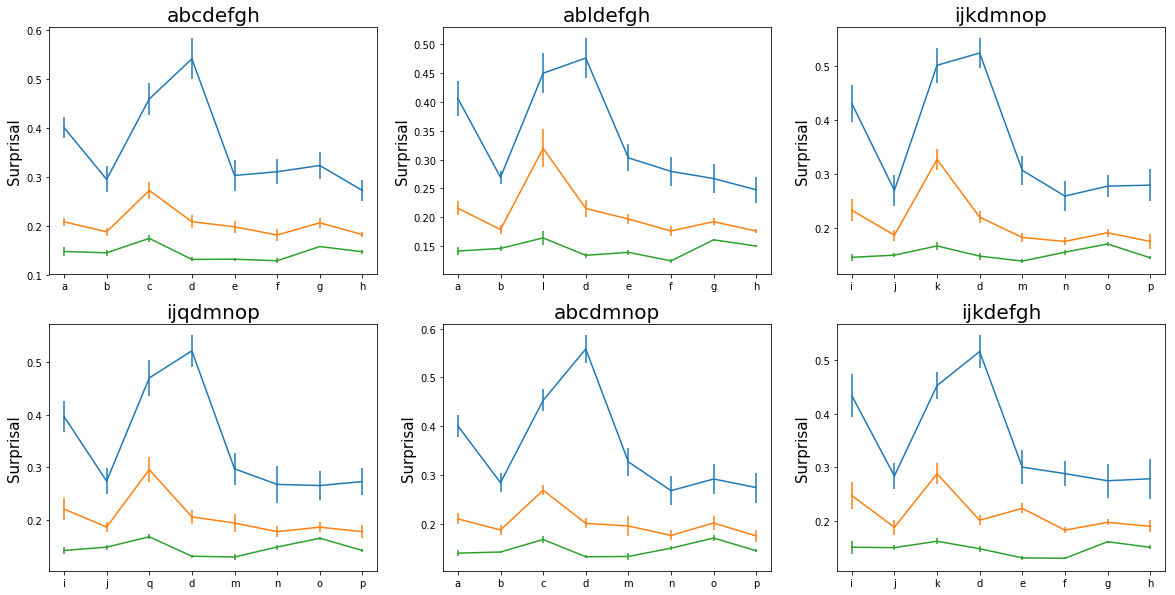

time: 978 ms


In [21]:
f, ax=plt.subplots(2,3, figsize=(20,10))
x=np.arange(8)
ax[0,0].errorbar(x,np.mean(fam_chunk1,0)[0], yerr=CI(0.95,fam_chunk1[:,0,:]))
ax[0,0].errorbar(x,np.mean(fam_chunk1,0)[1], yerr=CI(0.95,fam_chunk1[:,1,:]))
ax[0,0].errorbar(x,np.mean(fam_chunk1,0)[2], yerr=CI(0.95,fam_chunk1[:,2,:]))
ax[0,0].set_xticklabels('abcdefgh')
ax[0,0].set_title('abcdefgh', size=20)


ax[0,1].errorbar(x,np.mean(fam_chunk2,0)[0], yerr=CI(0.95,fam_chunk2[:,0,:]))
ax[0,1].errorbar(x,np.mean(fam_chunk2,0)[1], yerr=CI(0.95,fam_chunk2[:,1,:]))
ax[0,1].errorbar(x,np.mean(fam_chunk2,0)[2], yerr=CI(0.95,fam_chunk2[:,2,:]))
ax[0,1].set_xticklabels('abldefgh')
ax[0,1].set_title('abldefgh', size=20)


ax[0,2].errorbar(x,np.mean(fam_chunk3,0)[0], yerr=CI(0.95,fam_chunk3[:,0,:]))
ax[0,2].errorbar(x,np.mean(fam_chunk3,0)[1], yerr=CI(0.95,fam_chunk3[:,1,:]))
ax[0,2].errorbar(x,np.mean(fam_chunk3,0)[2], yerr=CI(0.95,fam_chunk3[:,2,:]))
ax[0,2].set_xticklabels('ijkdmnop')
ax[0,2].set_title('ijkdmnop', size=20)


ax[1,0].errorbar(x,np.mean(fam_chunk4,0)[0], yerr=CI(0.95,fam_chunk4[:,0,:]))
ax[1,0].errorbar(x,np.mean(fam_chunk4,0)[1], yerr=CI(0.95,fam_chunk4[:,1,:]))
ax[1,0].errorbar(x,np.mean(fam_chunk4,0)[2], yerr=CI(0.95,fam_chunk4[:,2,:]))
ax[1,0].set_xticklabels('ijqdmnop')
ax[1,0].set_title('ijqdmnop', size=20)


ax[1,1].errorbar(x,np.mean(ufam_chunk1,0)[0], yerr=CI(0.95,ufam_chunk1[:,0,:]))
ax[1,1].errorbar(x,np.mean(ufam_chunk1,0)[1], yerr=CI(0.95,ufam_chunk1[:,1,:]))
ax[1,1].errorbar(x,np.mean(ufam_chunk1,0)[2], yerr=CI(0.95,ufam_chunk1[:,2,:]))
ax[1,1].set_xticklabels('abcdmnop')
ax[1,1].set_title('abcdmnop', size=20)


ax[1,2].errorbar(x,np.mean(ufam_chunk2,0)[0], yerr=CI(0.95,ufam_chunk2[:,0,:]))
ax[1,2].errorbar(x,np.mean(ufam_chunk2,0)[1], yerr=CI(0.95,ufam_chunk2[:,1,:]))
ax[1,2].errorbar(x,np.mean(ufam_chunk2,0)[2], yerr=CI(0.95,ufam_chunk2[:,2,:]))
ax[1,2].set_xticklabels('ijkdefgh')
ax[1,2].set_title('ijkdefgh', size=20)


for a in ax.flat:
    a.set(xticks=np.arange(8))
    a.set_ylabel('Surprisal', fontsize = 15) # Y label
#     a.set_ylim(0,0.14)
    
plt.show()

In [ ]:
TR=test['TR'][1:]

time: 867 µs


In [ ]:
TR_chunk1=[]
TR_chunk2=[]
TR_chunk3=[]
TR_chunk4=[]
uTR_chunk1=[]
uTR_chunk2=[]
for i in range(len(seq_test)):
    if seq_test_trim[i:i+8]=='abcdefgh':
        TR_chunk1.append(TR[i:i+8])
    elif seq_test_trim[i:i+8]=='abldefgh':
        TR_chunk2.append(TR[i:i+8])
    elif seq_test_trim[i:i+8]=='ijkdmnop':
        TR_chunk3.append(TR[i:i+8])
    elif seq_test_trim[i:i+8]=='ijqdmnop':
        TR_chunk4.append(TR[i:i+8])
    elif seq_test_trim[i:i+8]=='abcdmnop':
        uTR_chunk1.append(TR[i:i+8])
    elif seq_test_trim[i:i+8]=='ijkdefgh':
        uTR_chunk2.append(TR[i:i+8])

time: 40.1 ms


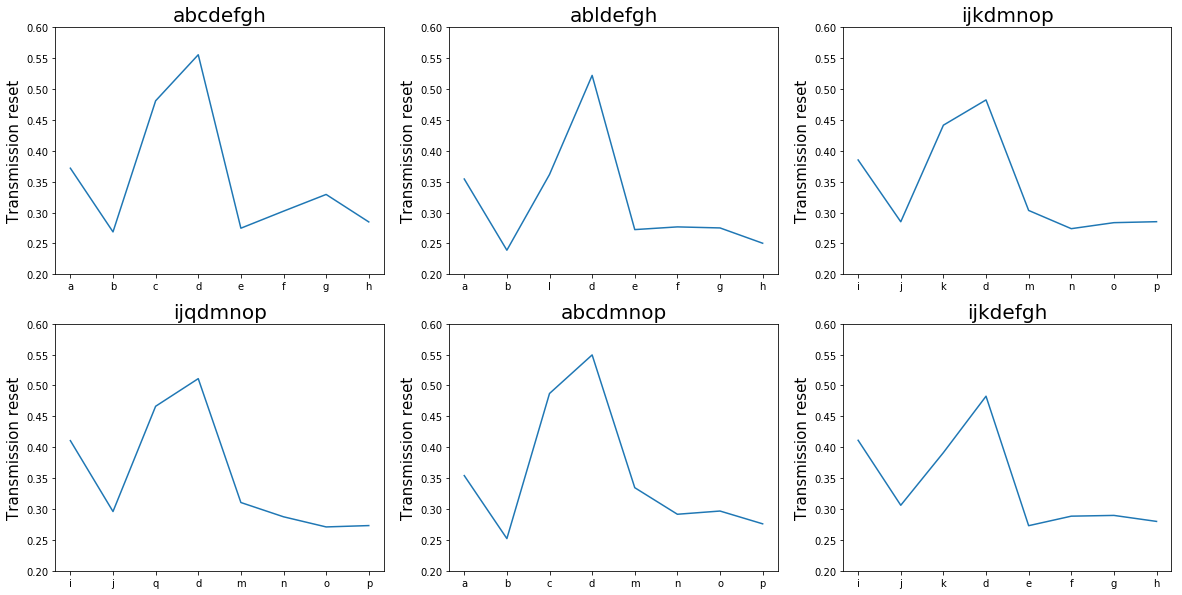

time: 858 ms


In [ ]:
f, ax=plt.subplots(2,3, figsize=(20,10))
ax[0,0].plot(np.mean(TR_chunk1,0))
ax[0,0].set_xticklabels('abcdefgh')
ax[0,0].set_title('abcdefgh', size=20)

ax[0,1].plot(np.mean(TR_chunk2,0))
ax[0,1].set_xticklabels('abldefgh')
ax[0,1].set_title('abldefgh', size=20)

ax[0,2].plot(np.mean(TR_chunk3,0))
ax[0,2].set_xticklabels('ijkdmnop')
ax[0,2].set_title('ijkdmnop', size=20)

ax[1,0].plot(np.mean(TR_chunk4,0))
ax[1,0].set_xticklabels('ijqdmnop')
ax[1,0].set_title('ijqdmnop', size=20)

ax[1,1].plot(np.mean(uTR_chunk1,0))
ax[1,1].set_xticklabels('abcdmnop')
ax[1,1].set_title('abcdmnop', size=20)

ax[1,2].plot(np.mean(uTR_chunk2,0))
ax[1,2].set_xticklabels('ijkdefgh')
ax[1,2].set_title('ijkdefgh', size=20)

for a in ax.flat:
    a.set(xticks=np.arange(8))
    a.set_ylabel('Transmission reset', fontsize = 15) # Y label
    a.set_ylim(0.2,0.6)
plt.show()